In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optionnel : joli thème pour les graphes
sns.set(style="whitegrid")

# Chargement des données consolidées depuis le fichier CSV
df = pd.read_csv("cve_consolidated.csv")

# Aperçu rapide
df.head()


,ID du bulletin,Titre du bulletin,Type de bulletin,Date de publication,Lien du bulletin,Identifiant CVE,Description,Score CVSS,Base Severity,Type CWE,Score EPSS,Éditeur/Vendor,Produit,Versions affectées
0,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-4128,"Mattermost versions 10.5.x <= 10.5.4, 9.11.x <...",3.1,LOW,CWE-863,0.00021,Mattermost,Mattermost,"10.5.0, 9.11.0"
1,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-4573,"Mattermost versions 10.7.x <= 10.7.1, 10.6.x <...",4.1,MEDIUM,CWE-90,0.00022,Mattermost,Mattermost,"10.7.0, 10.6.0, 10.5.0, 9.11.0"
2,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-43003,SAP S/4 HANA allows an authenticated attacker ...,6.4,MEDIUM,CWE-749,0.00053,SAP_SE,SAP S/4HANA (Private Cloud & On-Premise),"S4CRM 204, 205, 206, S4CEXT 107, 108, BBPCRM 7..."
3,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-43007,SAP Service Parts Management (SPM) does not pe...,6.3,MEDIUM,CWE-862,0.00044,SAP_SE,SAP Service Parts Management (SPM),"SAP_APPL 617, 618, S4CORE 100, 101, 102, 103"
4,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-23191,Cached values belonging to the SAP OData endpo...,3.1,LOW,CWE-644,0.00050,SAP_SE,SAP Fiori for SAP ERP,"SAP_GWFND 740, 750, 751, 752, 753, 754, 755, 7..."


In [347]:
# Affichage d'informations générales sur les colonnes et les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819 entries, 0 to 3818
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID du bulletin       3819 non-null   object 
 1   Titre du bulletin    3819 non-null   object 
 2   Type de bulletin     3819 non-null   object 
 3   Date de publication  3819 non-null   object 
 4   Lien du bulletin     3819 non-null   object 
 5   Identifiant CVE      3819 non-null   object 
 6   Description          3819 non-null   object 
 7   Score CVSS           1509 non-null   float64
 8   Base Severity        3819 non-null   object 
 9   Type CWE             3819 non-null   object 
 10  Score EPSS           3783 non-null   float64
 11  Éditeur/Vendor       3738 non-null   object 
 12  Produit              3755 non-null   object 
 13  Versions affectées   3752 non-null   object 
dtypes: float64(2), object(12)
memory usage: 417.8+ KB


In [348]:
print("\n--- Top 10 des éditeurs ---")
print(df["Éditeur/Vendor"].value_counts().head(10))

print("\n--- Top 10 des produits ---")
print(df["Produit"].value_counts().head(10))

print("\n--- Top 10 des CWE ---")
print(df["Type CWE"].value_counts().head(10))

print("\n--- Répartition des sévérités ---")
print(df["Base Severity"].value_counts())



--- Top 10 des éditeurs ---
Éditeur/Vendor
Linux                 1442
Microsoft             1058
Red Hat                543
Siemens                164
Inconnu                 48
Moxa                    48
SAP_SE                  42
Fortinet                37
Ivanti                  32
Palo Alto Networks      24
Name: count, dtype: int64

--- Top 10 des produits ---
Produit
Linux                                             1439
Red Hat OpenShift Container Platform 4             175
Inconnu                                             48
Windows Server 2022                                 45
Red Hat Enterprise Linux 9                          45
Windows Server 2019 (Server Core installation)      44
Windows Server 2019                                 44
Windows 10 Version 1809                             44
Windows Server 2016 (Server Core installation)      42
Windows Server 2016                                 42
Name: count, dtype: int64

--- Top 10 des CWE ---
Type CWE
Non disponible

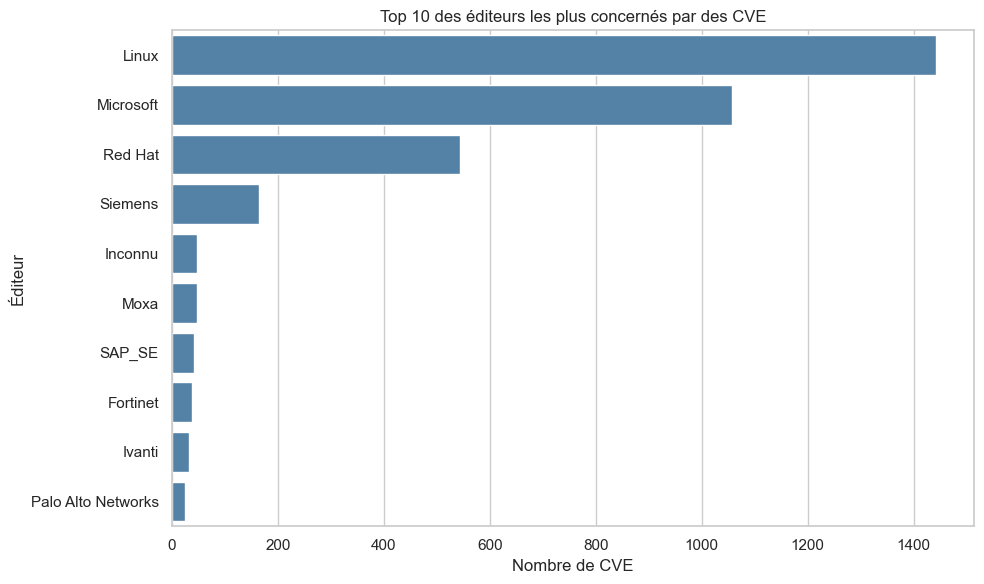

In [349]:
# Calcul du top 10 des éditeurs
top_vendors = df["Éditeur/Vendor"].value_counts().head(10).reset_index()
top_vendors.columns = ["Éditeur", "Nombre de CVE"]

# Affichage du graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=top_vendors, x="Nombre de CVE", y="Éditeur", color="steelblue")
plt.title("Top 10 des éditeurs les plus concernés par des CVE")
plt.xlabel("Nombre de CVE")
plt.ylabel("Éditeur")
plt.tight_layout()
plt.savefig("graphe_top_editeurs.png")
plt.show()

C:\Users\diaby\AppData\Local\Temp\ipykernel_30884\3440904934.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cwe, x="Nombre de CVE", y="Type CWE", palette=couleurs)


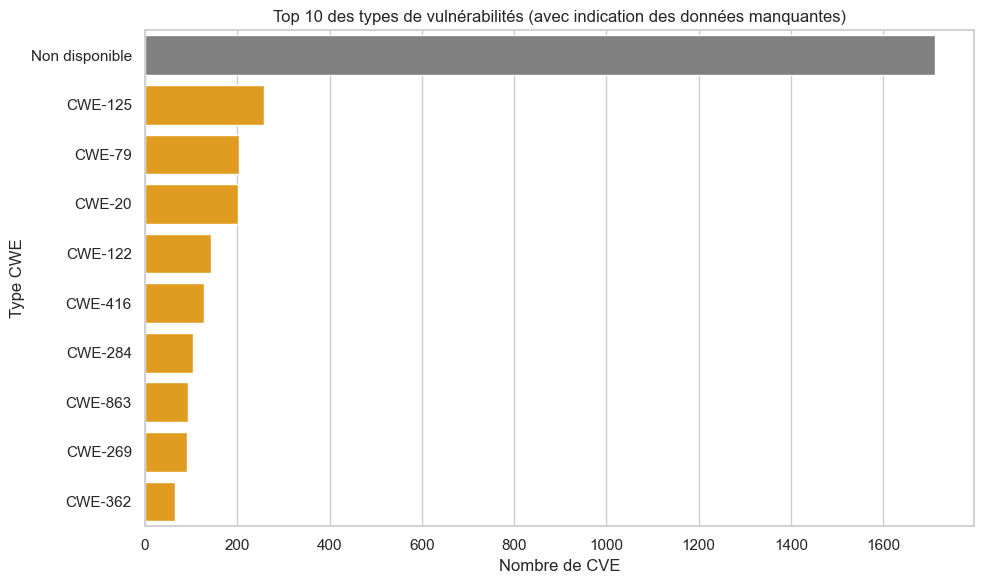

In [350]:
top_cwe = df["Type CWE"].value_counts().head(10).reset_index()
top_cwe.columns = ["Type CWE", "Nombre de CVE"]

# Couleur spéciale pour la valeur manquante
couleurs = ["gray" if cwe == "Non disponible" else "orange" for cwe in top_cwe["Type CWE"]]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cwe, x="Nombre de CVE", y="Type CWE", palette=couleurs)
plt.title("Top 10 des types de vulnérabilités (avec indication des données manquantes)")
plt.xlabel("Nombre de CVE")
plt.ylabel("Type CWE")
plt.tight_layout()
plt.show()

### Disponibilité des types de vulnérabilités (CWE)

Dans de nombreux cas, les identifiants CVE ne sont pas encore associés à un type de vulnérabilité CWE spécifique, soit parce qu'ils sont récents, soit parce que l'information n'est pas encore publiée par les organismes comme par exemple MITRE.

Nous analysons ici la proportion de CVE pour lesquels le type CWE est renseigné ("Disponible") par rapport à ceux marqués "Non disponible".


📊 Répartition CWE :
Type CWE
Disponible        2108
Non disponible    1711
Name: count, dtype: int64


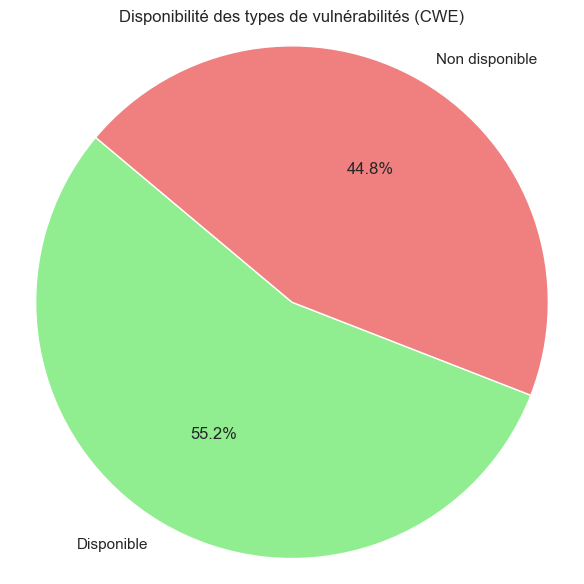

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformation binaire : Disponible vs Non disponible
cwe_disponibilite = df["Type CWE"].apply(
    lambda x: "Non disponible" if str(x).strip().lower() == "non disponible" else "Disponible"
).value_counts()

# 2. Affichage des chiffres
print("📊 Répartition CWE :")
print(cwe_disponibilite)

# 3. Graphique
plt.figure(figsize=(6, 6))
plt.pie(
    cwe_disponibilite.values,
    labels=cwe_disponibilite.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=["lightgreen", "lightcoral"]
)
plt.title("Disponibilité des types de vulnérabilités (CWE)")
plt.axis("equal")
plt.tight_layout()
plt.show()

### Analyse de la sévérité CVSS

Le champ "Base Severity" permet de catégoriser chaque CVE selon sa gravité (CRITICAL, HIGH, MEDIUM, LOW...).

Cependant, un grand nombre de vulnérabilités recensées n'ont pas encore de score CVSS attribué (cas "Non disponible"). Pour remédier à cela :

- Un premier graphique présente toutes les données, y compris les valeurs manquantes.
- Un deuxième camembert illustre la part exacte des données disponibles vs. manquantes.


C:\Users\diaby\AppData\Local\Temp\ipykernel_30884\4006318854.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="Reds")


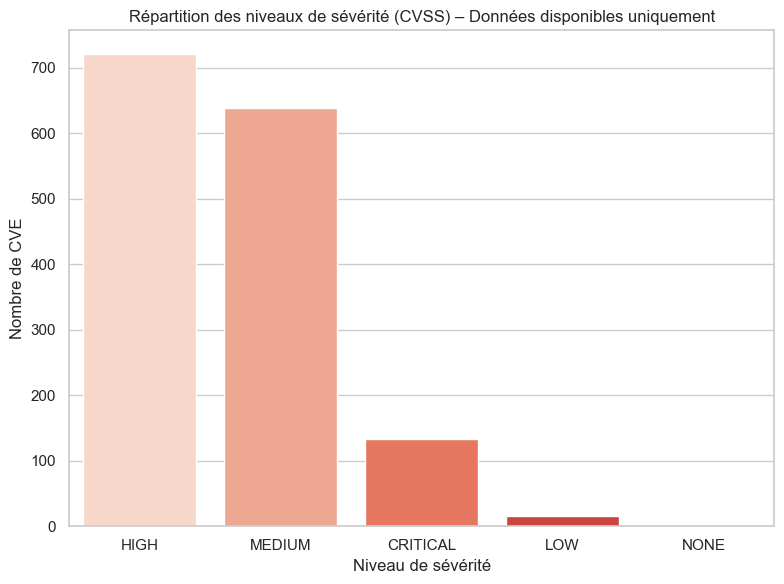

In [352]:
# Supprime les CVE avec Base Severity manquant ou "non disponible"
df_sev = df[df["Base Severity"].str.lower() != "non disponible"]

# Recompte
severity_counts = df_sev["Base Severity"].value_counts()

# Graphe propre
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="Reds")
plt.title("Répartition des niveaux de sévérité (CVSS) – Données disponibles uniquement")
plt.xlabel("Niveau de sévérité")
plt.ylabel("Nombre de CVE")
plt.tight_layout()
plt.show()

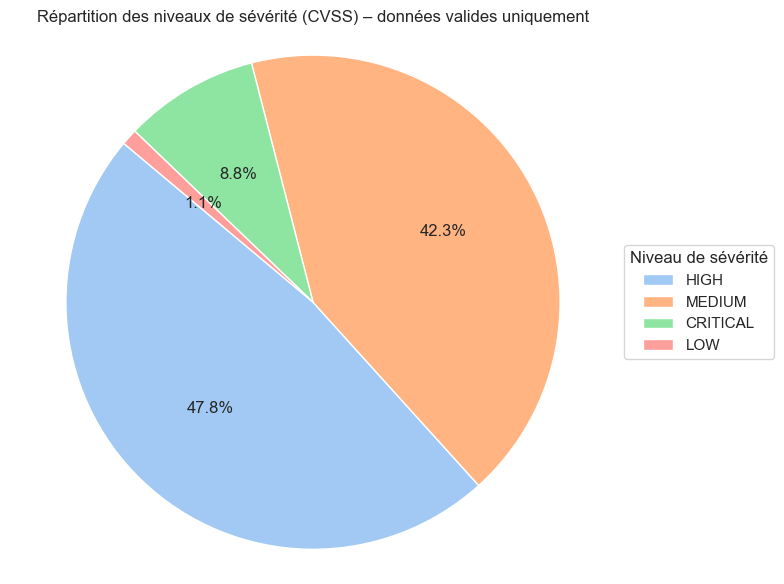

Données disponibles : 39.5% des CVE ont un score de sévérité exploitable.


In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrage des données valides et sans "non disponible" ni "NONE"
df_valide = df[
    (~df["Base Severity"].str.lower().isin(["non disponible", "none"])) &
    (df["Base Severity"].notna())
]
severity_counts = df_valide["Base Severity"].value_counts()
colors = sns.color_palette("pastel", len(severity_counts))

# Création du camembert
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    severity_counts.values,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

# Légende externe
plt.legend(
    wedges, severity_counts.index,
    title="Niveau de sévérité",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Titre et ajustements
plt.title("Répartition des niveaux de sévérité (CVSS) – données valides uniquement")
plt.axis('equal')  # Pour un cercle parfait
plt.tight_layout()
plt.show()


# Bloc explicatif
print(f"Données disponibles : {part_dispo:.1f}% des CVE ont un score de sévérité exploitable.")



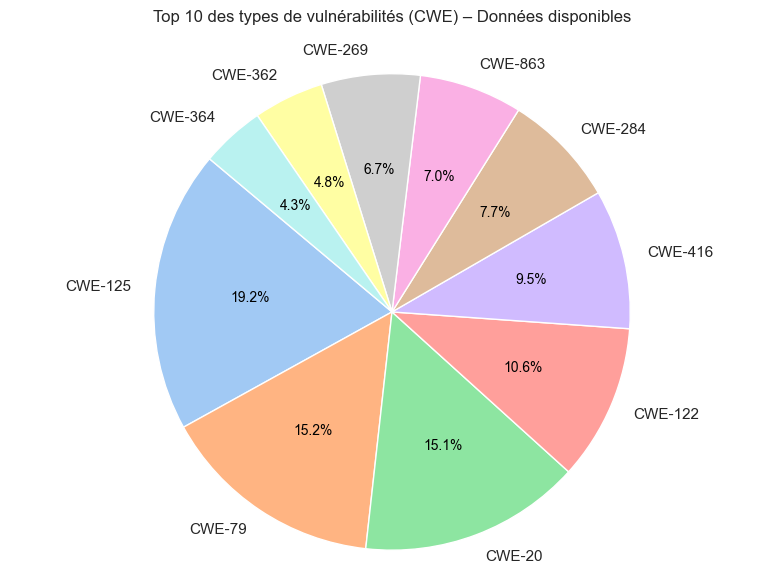

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrage des données disponibles uniquement
top_cwe_valide = df[df["Type CWE"].str.lower() != "non disponible"]["Type CWE"].value_counts().head(10)

# Affichage du camembert
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel", len(top_cwe_valide))

wedges, texts, autotexts = plt.pie(
    top_cwe_valide.values,
    labels=top_cwe_valide.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "white"}
)

# Amélioration du texte
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(10)

plt.title("Top 10 des types de vulnérabilités (CWE) – Données disponibles", pad=20)
plt.axis("equal")
plt.tight_layout()
plt.show()


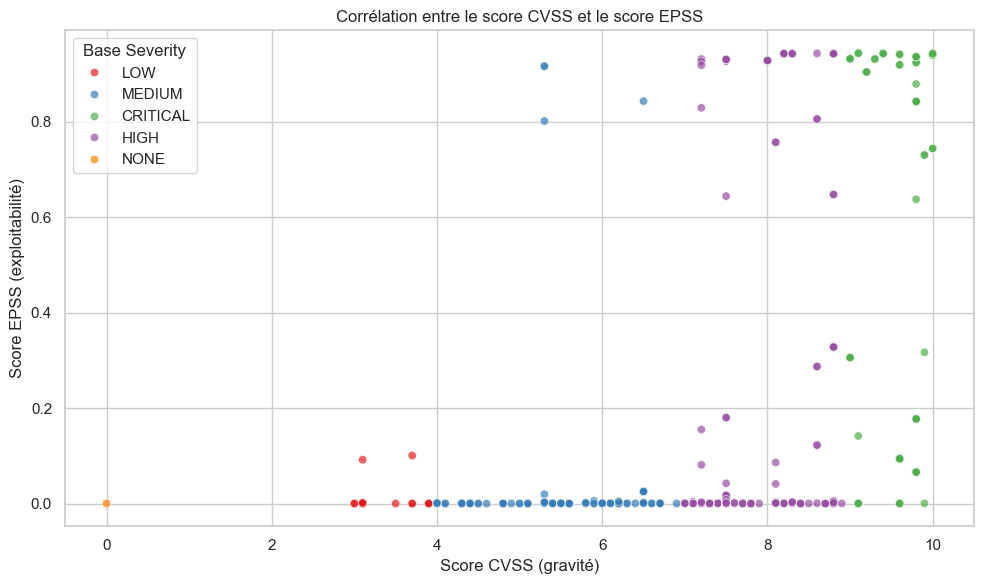

In [355]:
# On enlève les lignes où CVSS ou EPSS est manquant
df_corr = df.dropna(subset=["Score CVSS", "Score EPSS"])

# Tracer la corrélation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_corr,
    x="Score CVSS",
    y="Score EPSS",
    hue="Base Severity",
    palette="Set1",
    alpha=0.7
)
plt.title("Corrélation entre le score CVSS et le score EPSS")
plt.xlabel("Score CVSS (gravité)")
plt.ylabel("Score EPSS (exploitabilité)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Analyse du Top 10 des CVE critiques et très exploitables

Le graphique ci-dessus compare les **scores CVSS** (gravité) et **scores EPSS** (probabilité d’exploitation) pour les 10 CVE les plus critiques détectées dans le jeu de données. Ces CVE répondent aux critères suivants :

- **Score CVSS ≥ 9.0** : vulnérabilités considérées comme critiques.
- **Score EPSS ≥ 0.7** : hautement susceptibles d’être exploitées dans les 30 prochains jours.

#### Interprétation :
- Des scores **EPSS supérieurs à 0.9** indiquent un **risque d’exploitation immédiat** (ex : CVE-2023-35078, CVE-2024-3400).
- Des scores **CVSS à 10.0** révèlent une **sévérité maximale**, mais cela ne garantit pas qu'elles soient activement exploitées.
- L’approche combinée CVSS + EPSS permet de **prioriser intelligemment** les correctifs.

#### Recommandation :
Concentrer les efforts sur les CVE cumulant **CVSS élevé et EPSS > 0.9**, car elles représentent les menaces **les plus urgentes et les plus plausibles**.

In [356]:
import pandas as pd
from IPython.display import display  # si tu es dans Jupyter

# Affiche toutes les colonnes sans coupures
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Filtrer les CVE critiques et très exploitables
cve_critiques = df[
    (df["Score CVSS"] >= 9.0) & 
    (df["Score EPSS"] >= 0.7)
].sort_values(by=["Score CVSS", "Score EPSS"], ascending=False)

# Sélection des colonnes utiles
colonnes_affichees = [
    "Identifiant CVE", "Éditeur/Vendor", "Produit",
    "Score CVSS", "Score EPSS", "Type CWE"
]

# Affichage propre du top 10
print("\n--- Top 10 des CVE critiques et très exploitables ---")
display(cve_critiques[colonnes_affichees].head(10))



--- Top 10 des CVE critiques et très exploitables ---


,Identifiant CVE,Éditeur/Vendor,Produit,Score CVSS,Score EPSS,Type CWE
3721,CVE-2023-35078,Ivanti,Endpoint Manager Mobile,10.0,0.94485,Non disponible
3720,CVE-2023-35082,Ivanti,EPMM,10.0,0.94468,Non disponible
3752,CVE-2024-3400,Palo Alto Networks,PAN-OS,10.0,0.94294,CWE-77
3753,CVE-2024-3400,Palo Alto Networks,Cloud NGFW,10.0,0.94294,CWE-77
3754,CVE-2024-3400,Palo Alto Networks,Prisma Access,10.0,0.94294,CWE-77
3728,CVE-2023-20198,Cisco,Cisco IOS XE Software,10.0,0.94190,CWE-420
3745,CVE-2023-7028,GitLab,GitLab,10.0,0.93941,CWE-640
13,CVE-2025-31324,SAP_SE,SAP NetWeaver (Visual Composer development ser...,10.0,0.74446,CWE-434
3810,CVE-2025-31324,SAP_SE,SAP NetWeaver (Visual Composer development ser...,10.0,0.74446,CWE-434
27,CVE-2025-49113,Roundcube,Webmail,9.9,0.73080,CWE-502


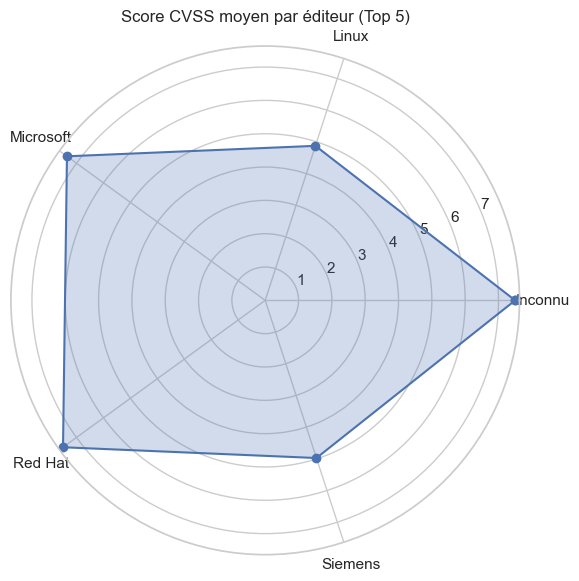

In [357]:
# Moyenne des scores CVSS pour les principaux éditeurs
top_edit = df["Éditeur/Vendor"].value_counts().head(5).index
moy_par_editeur = df[df["Éditeur/Vendor"].isin(top_edit)].groupby("Éditeur/Vendor")["Score CVSS"].mean()

# Radar chart
import numpy as np

labels = list(moy_par_editeur.index)
scores = moy_par_editeur.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
scores = np.concatenate((scores, [scores[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, scores, marker='o')
ax.fill(angles, scores, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Score CVSS moyen par éditeur (Top 5)")
plt.tight_layout()
plt.show()

## Corrélation entre variables numériques

Cette matrice permet d’analyser les liens entre différents indicateurs de gravité des CVE :
- **Score CVSS** : gravité technique (0–10)
- **Score EPSS** : probabilité d’exploitation (0–1)
- **Longueur description** : taille du texte descriptif
- **Score Sévérité** : niveau encodé (1 à 4)

### Observations clés

- **CVSS et Sévérité** : très forte corrélation (0.93), logique car la sévérité dépend du CVSS.
- **CVSS et EPSS** : corrélation modérée (0.38), donc gravité ≠ exploitabilité.
- **Longueur et autres** : corrélations faibles ou négatives. Les longues descriptions ne signifient pas plus de danger.

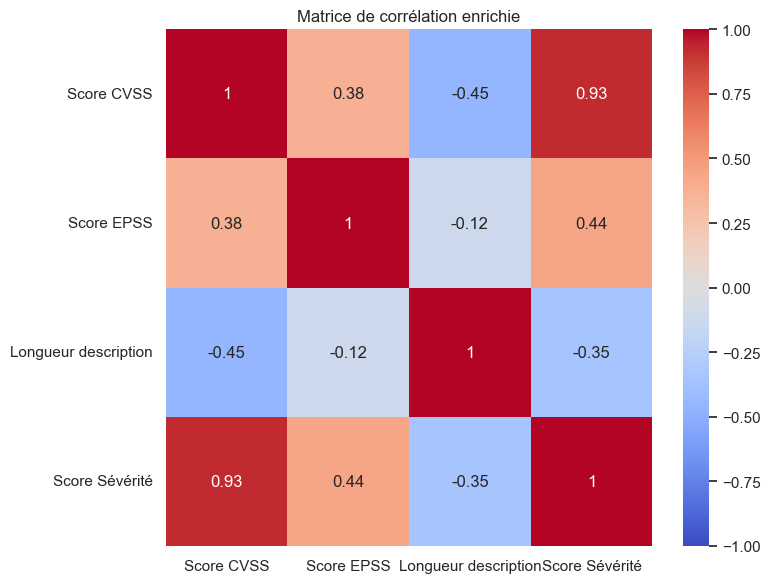

In [358]:
# Copie du DataFrame pour enrichir les données
df_corr = df[["Score CVSS", "Score EPSS"]].copy()

# Ajout d'une colonne : longueur de la description
df_corr["Longueur description"] = df["Description"].fillna("").apply(len)

# Ajout : score de sévérité encodé (High=3, Medium=2, Low=1, autres=0)
mapping = {"critical": 4, "high": 3, "medium": 2, "low": 1}
df_corr["Score Sévérité"] = df["Base Severity"].str.lower().map(mapping).fillna(0)

# Nettoyage
df_corr = df_corr.dropna()

# Matrice de corrélation
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de corrélation enrichie")
plt.tight_layout()
plt.show()

C:\Users\diaby\AppData\Local\Temp\ipykernel_30884\501724036.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x="Éditeur/Vendor", y="Score CVSS", palette="Set2")


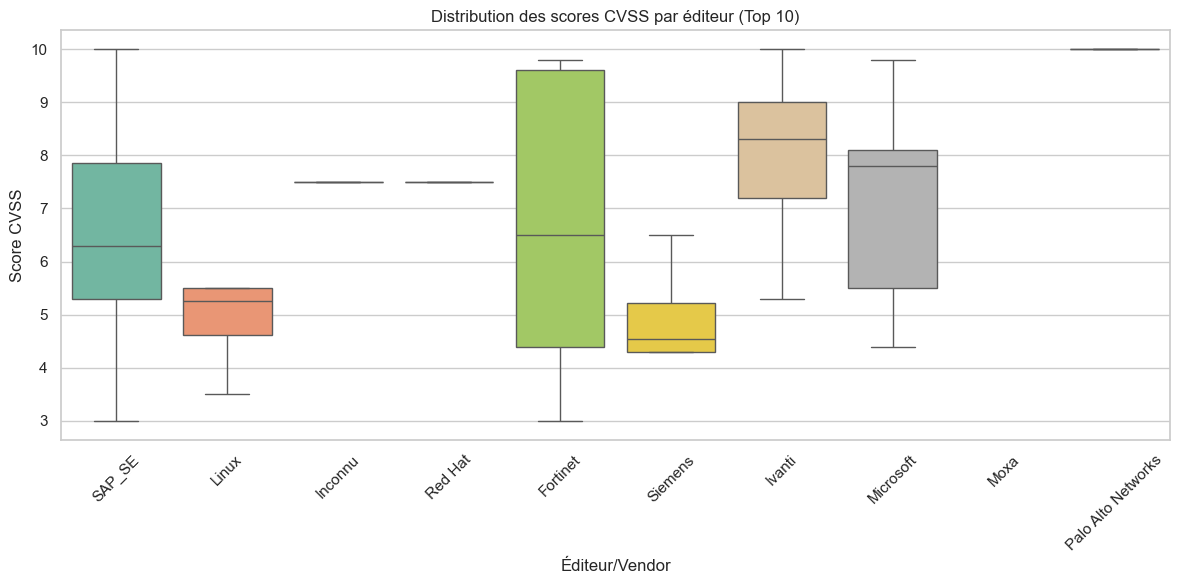

In [359]:
top_editeurs = df["Éditeur/Vendor"].value_counts().head(10).index
df_top = df[df["Éditeur/Vendor"].isin(top_editeurs)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x="Éditeur/Vendor", y="Score CVSS", palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution des scores CVSS par éditeur (Top 10)")
plt.tight_layout()
plt.show()

In [360]:
# Analyse : CVE critiques ET très exploitables
cve_critiques = df[
    (df["Score CVSS"] >= 9.0) &
    (df["Score EPSS"] >= 0.7)
].sort_values(by=["Score CVSS", "Score EPSS"], ascending=False)

print("\n--- CVE critiques et très exploitables (CVSS ≥ 9 et EPSS ≥ 0.7) ---")
cve_critiques[[
    "Identifiant CVE", "Éditeur/Vendor", "Produit", "Score CVSS", "Score EPSS", "Type CWE"
]].head(10)



--- CVE critiques et très exploitables (CVSS ≥ 9 et EPSS ≥ 0.7) ---


,Identifiant CVE,Éditeur/Vendor,Produit,Score CVSS,Score EPSS,Type CWE
3721,CVE-2023-35078,Ivanti,Endpoint Manager Mobile,10.0,0.94485,Non disponible
3720,CVE-2023-35082,Ivanti,EPMM,10.0,0.94468,Non disponible
3752,CVE-2024-3400,Palo Alto Networks,PAN-OS,10.0,0.94294,CWE-77
3753,CVE-2024-3400,Palo Alto Networks,Cloud NGFW,10.0,0.94294,CWE-77
3754,CVE-2024-3400,Palo Alto Networks,Prisma Access,10.0,0.94294,CWE-77
3728,CVE-2023-20198,Cisco,Cisco IOS XE Software,10.0,0.94190,CWE-420
3745,CVE-2023-7028,GitLab,GitLab,10.0,0.93941,CWE-640
13,CVE-2025-31324,SAP_SE,SAP NetWeaver (Visual Composer development ser...,10.0,0.74446,CWE-434
3810,CVE-2025-31324,SAP_SE,SAP NetWeaver (Visual Composer development ser...,10.0,0.74446,CWE-434
27,CVE-2025-49113,Roundcube,Webmail,9.9,0.73080,CWE-502


In [361]:
# Analyse : CVE à forte gravité mais peu exploitables
cve_sous_estimees = df[
    (df["Score CVSS"] >= 8.0) &
    (df["Score EPSS"] < 0.1)
].sort_values(by="Score CVSS", ascending=False)

print("\n--- CVE graves mais peu exploitables (CVSS ≥ 8 et EPSS < 0.1) ---")
cve_sous_estimees[[
    "Identifiant CVE", "Éditeur/Vendor", "Produit", "Score CVSS", "Score EPSS", "Type CWE"
]].head(10)



--- CVE graves mais peu exploitables (CVSS ≥ 8 et EPSS < 0.1) ---


,Identifiant CVE,Éditeur/Vendor,Produit,Score CVSS,Score EPSS,Type CWE
37,CVE-2025-20286,Cisco,Cisco Identity Services Engine Software,9.9,0.00051,CWE-259
3616,CVE-2022-34722,Microsoft,Windows 10 Version 1809,9.8,0.06616,Non disponible
3624,CVE-2022-34722,Microsoft,Windows 10 Version 1507,9.8,0.06616,Non disponible
3618,CVE-2022-34722,Microsoft,Windows Server 2019 (Server Core installation),9.8,0.06616,Non disponible
3631,CVE-2022-34722,Microsoft,Windows Server 2008 Service Pack 2,9.8,0.06616,Non disponible
3625,CVE-2022-34722,Microsoft,Windows 10 Version 1607,9.8,0.06616,Non disponible
3626,CVE-2022-34722,Microsoft,Windows Server 2016,9.8,0.06616,Non disponible
3627,CVE-2022-34722,Microsoft,Windows Server 2016 (Server Core installation),9.8,0.06616,Non disponible
3619,CVE-2022-34722,Microsoft,Windows 10 Version 21H1,9.8,0.06616,Non disponible
3621,CVE-2022-34722,Microsoft,Windows 10 Version 20H2,9.8,0.06616,Non disponible


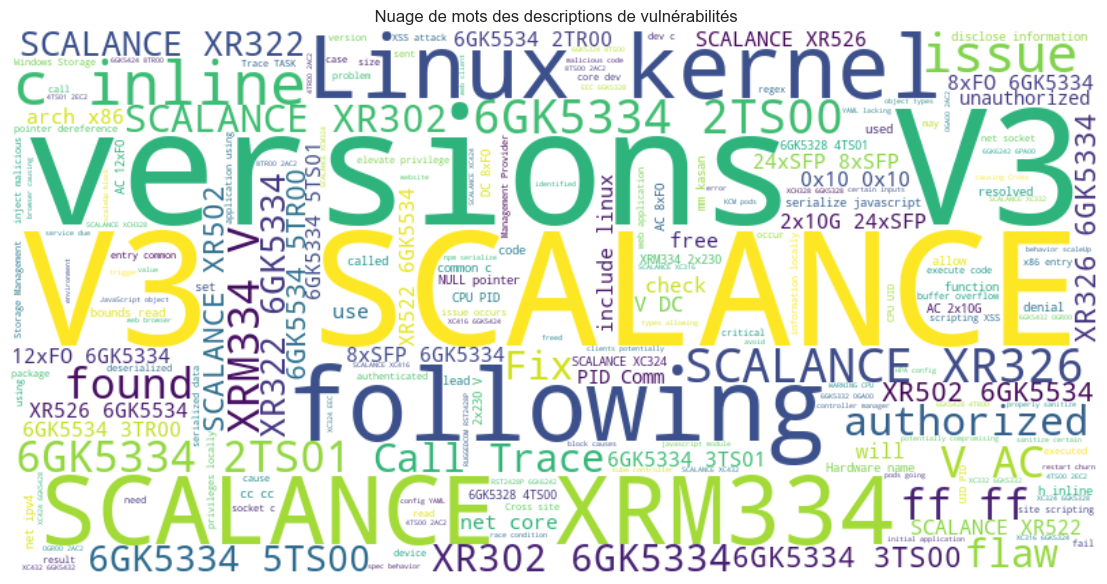

In [362]:
# Imports nécessaires

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Filtrage des descriptions non nulles
descriptions = df["Description"].dropna()

# Fusion de toutes les descriptions
texte = " ".join(descriptions)

# Stopwords personnalisés pour nettoyer le nuage
stopwords = set(STOPWORDS)
stopwords.update([
    "vulnerability", "allows", "successful", "attacker", 
    "remote", "could", "affected", "cve", "via", "user"
])

# Génération du nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis'
).generate(texte)

# Affichage du nuage
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" Nuage de mots des descriptions de vulnérabilités")
plt.tight_layout()
plt.show()


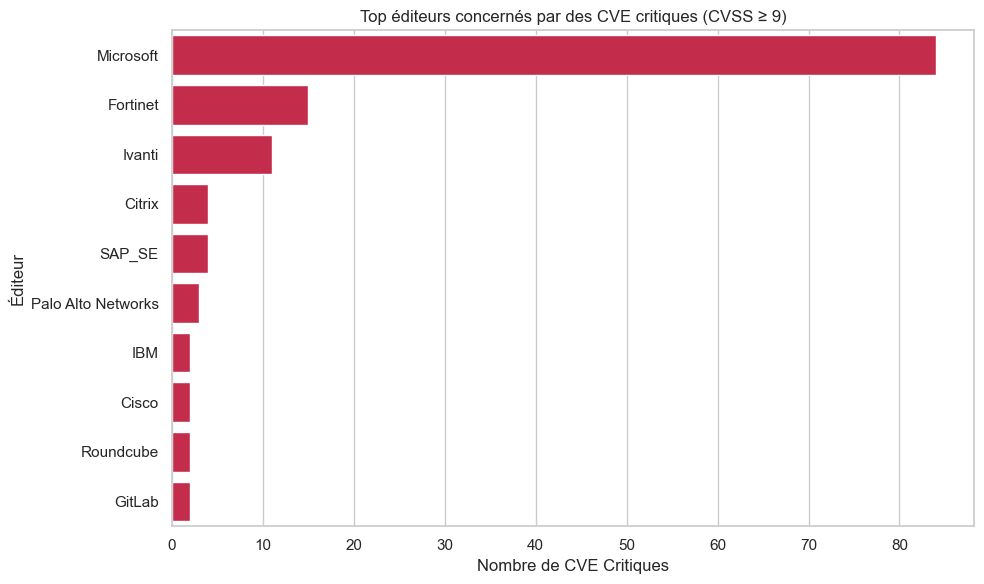

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrage des CVE critiques
cve_critiques = df[df["Score CVSS"] >= 9.0]

# Top éditeurs
top_editeurs_critiques = cve_critiques["Éditeur/Vendor"].value_counts().head(10).reset_index()
top_editeurs_critiques.columns = ["Éditeur", "Nombre de CVE Critiques"]

# Graphe
plt.figure(figsize=(10, 6))
sns.barplot(data=top_editeurs_critiques, x="Nombre de CVE Critiques", y="Éditeur", color="crimson")
plt.title("Top éditeurs concernés par des CVE critiques (CVSS ≥ 9)")
plt.tight_layout()
plt.show()


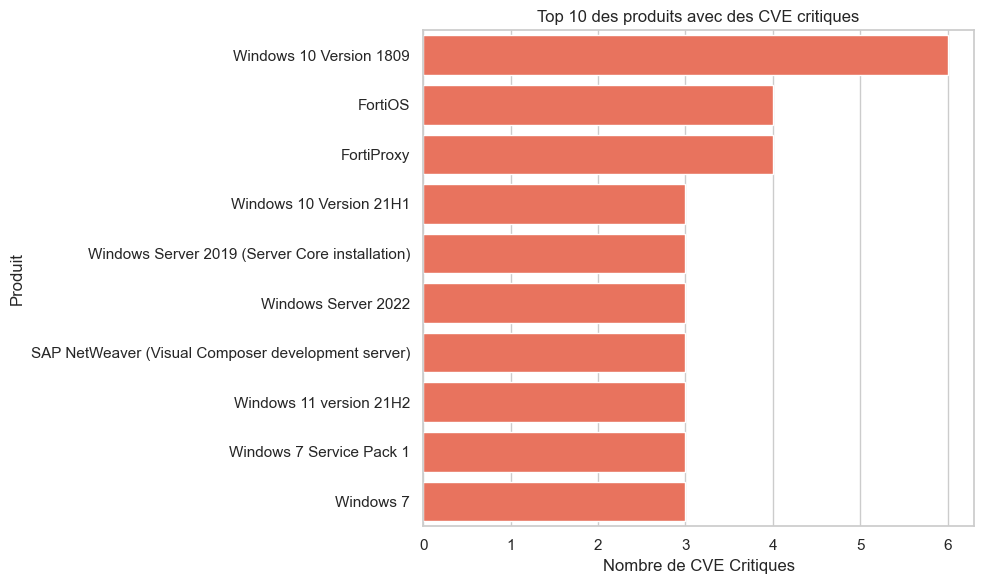

In [364]:
# Top produits avec des CVE critiques
top_produits_critiques = cve_critiques["Produit"].value_counts().head(10).reset_index()
top_produits_critiques.columns = ["Produit", "Nombre de CVE Critiques"]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_produits_critiques, x="Nombre de CVE Critiques", y="Produit", color="tomato")
plt.title("Top 10 des produits avec des CVE critiques")
plt.tight_layout()
plt.show()


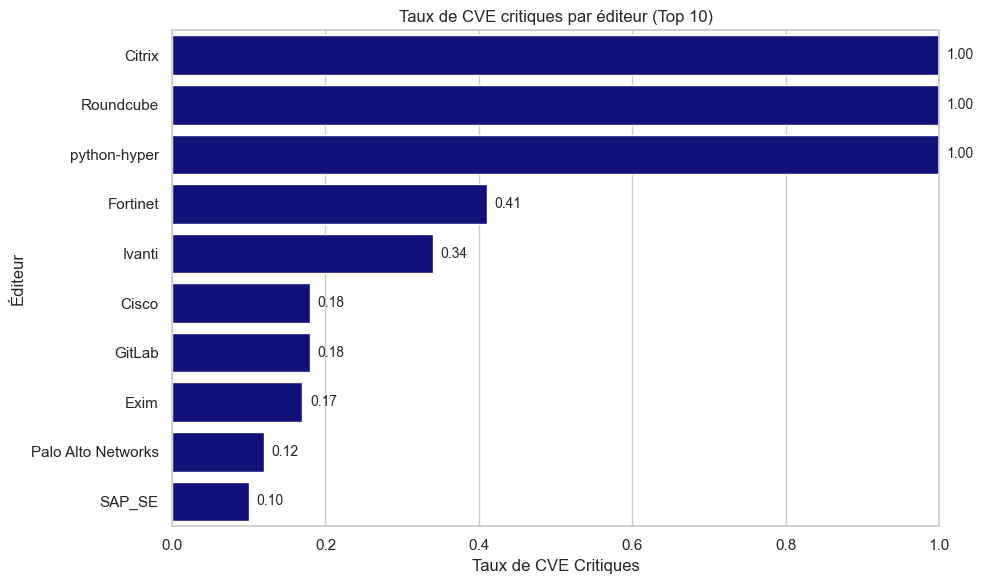

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total CVE par éditeur
total_par_editeur = df["Éditeur/Vendor"].value_counts()
critiques_par_editeur = cve_critiques["Éditeur/Vendor"].value_counts()

# Taux de criticité
taux_critiques = (critiques_par_editeur / total_par_editeur).dropna().sort_values(ascending=False).head(10)
taux_critiques = taux_critiques.reset_index()
taux_critiques.columns = ["Éditeur", "Taux de CVE Critiques"]
taux_critiques["Taux de CVE Critiques"] = taux_critiques["Taux de CVE Critiques"].round(2)

# Graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=taux_critiques, x="Taux de CVE Critiques", y="Éditeur", color="darkblue")

# Valeurs au-dessus des barres
for i, value in enumerate(taux_critiques["Taux de CVE Critiques"]):
    plt.text(value + 0.01, i, f"{value:.2f}", va="center", fontsize=10)

plt.title("Taux de CVE critiques par éditeur (Top 10)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


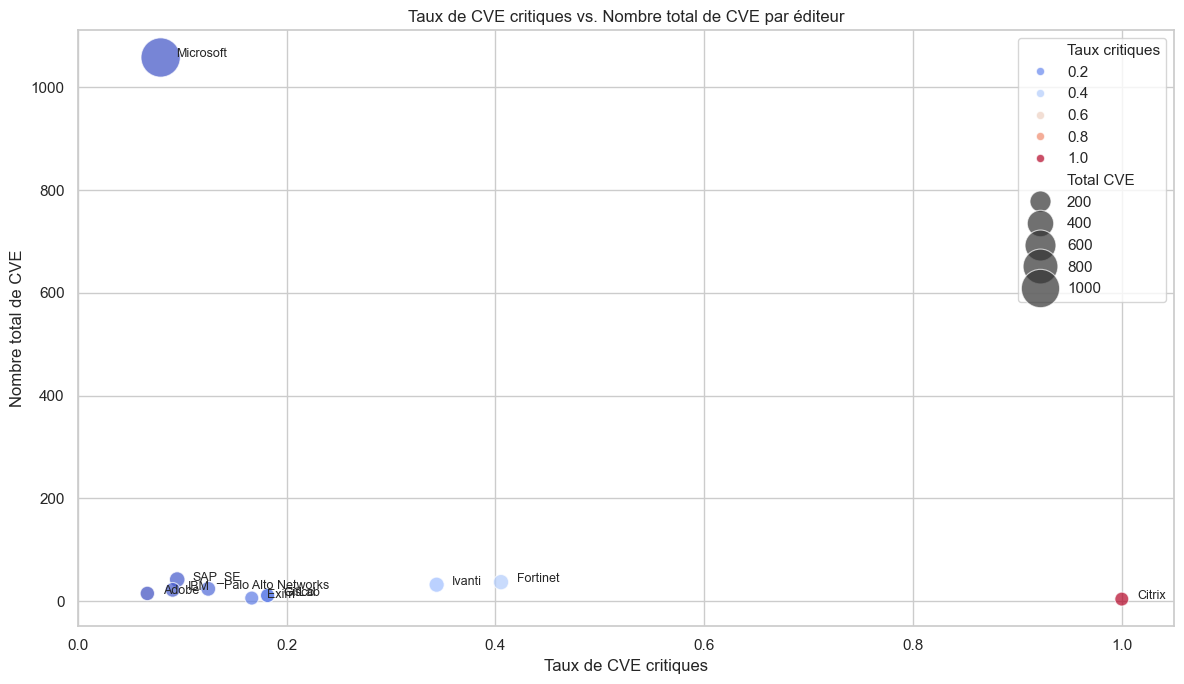

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Nombre total de CVE par éditeur
total_par_editeur = df["Éditeur/Vendor"].value_counts()

# 2. Nombre de CVE critiques par éditeur
cve_critiques = df[(df["Score CVSS"] >= 9.0) & (df["Base Severity"].str.lower() == "critical")]
critiques_par_editeur = cve_critiques["Éditeur/Vendor"].value_counts()

# 3. Fusion dans un DataFrame
df_taux = pd.DataFrame({
    "Total CVE": total_par_editeur,
    "Critiques": critiques_par_editeur
}).dropna()

# 4. Calcul du taux de CVE critiques
df_taux["Taux critiques"] = df_taux["Critiques"] / df_taux["Total CVE"]

# 5. Filtrage : uniquement les éditeurs avec un minimum de 3 CVE
df_taux = df_taux[df_taux["Total CVE"] >= 3].sort_values("Taux critiques", ascending=False).head(20)

# 6. Graphique amélioré
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_taux,
    x="Taux critiques",
    y="Total CVE",
    size="Total CVE",
    sizes=(100, 800),
    hue="Taux critiques",
    palette="coolwarm",
    alpha=0.7,
    legend="brief"
)

# 7. Affichage des noms avec décalage vertical aléatoire pour éviter chevauchement
for i, row in df_taux.iterrows():
    offset = np.random.uniform(-1, 1)
    plt.text(row["Taux critiques"] + 0.015, row["Total CVE"] + offset, i, fontsize=9)

plt.title("Taux de CVE critiques vs. Nombre total de CVE par éditeur")
plt.xlabel("Taux de CVE critiques")
plt.ylabel("Nombre total de CVE")
plt.xlim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

### ETAPE 7 : MACHINE LEARNING

### Clustering non supervisé avec K-Means
Cette méthode vise à regrouper automatiquement les CVE en clusters selon leur score de gravité (CVSS) et leur score d’exploitabilité (EPSS), sans connaissance préalable des classes.
Cela peut nous aider à identifier des profils de vulnérabilités similaires.

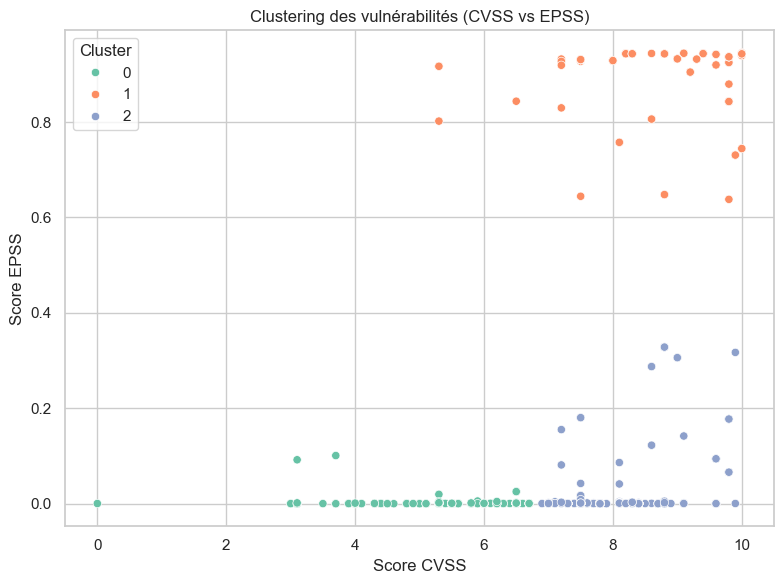

In [367]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation des données
df_cluster = df[["Score CVSS", "Score EPSS"]].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Application de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_cluster["Score CVSS"],
    y=df_cluster["Score EPSS"],
    hue=df_cluster["Cluster"],
    palette="Set2"
)
plt.title("Clustering des vulnérabilités (CVSS vs EPSS)")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.grid(True)
plt.tight_layout()
plt.show()


### Classification supervisée avec Random Forest
Nous construisons ici un modèle prédictif pour anticiper la sévérité (LOW, MEDIUM, HIGH, CRITICAL) d'une vulnérabilité en fonction de ses scores CVSS et EPSS.
Cela permettrait d’automatiser l’évaluation de la criticité de nouvelles CVE à partir de données chiffrées uniquement.

In [373]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Chargement du fichier CSV consolidé
df = pd.read_csv("cve_consolidated.csv")

# Nettoyage et préparation
df_clf = df.dropna(subset=["Score CVSS", "Score EPSS", "Base Severity"]).copy()
df_clf = df_clf[df_clf["Base Severity"].isin(["CRITICAL", "HIGH", "MEDIUM", "LOW"])]

# Encodage de la variable cible
le = LabelEncoder()
df_clf["Severity_encoded"] = le.fit_transform(df_clf["Base Severity"])

# Données d'entrée (features)
X = df_clf[["Score CVSS", "Score EPSS"]]
y = df_clf["Severity_encoded"]

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = clf.predict(X_test)

print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

=== Matrice de confusion ===
[[ 26   0   0   0]
 [  0 148   0   0]
 [  0   0   1   0]
 [  0   0   0 126]]

=== Rapport de classification ===
              precision    recall  f1-score   support

    CRITICAL       1.00      1.00      1.00        26
        HIGH       1.00      1.00      1.00       148
         LOW       1.00      1.00      1.00         1
      MEDIUM       1.00      1.00      1.00       126

    accuracy                           1.00       301
   macro avg       1.00      1.00      1.00       301
weighted avg       1.00      1.00      1.00       301

